""""
Load the Boston Housing dataset
Define the features (X) and target variable (y)
Split the data into training and testing sets
Create a Ridge or Lasso Regression model with a specified alpha value (regularization strength)
Train the model using fit
Make predictions on the testing set using predict
Evaluate the model using Mean Squared Error (MSE)
Note that you can adjust the alpha value to control the strength of regularization. A higher alpha value means stronger regularization.
""""

In [85]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
sns.set(color_codes=True)

# Load the Boston Housing dataset
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
data.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
# Check for missing values
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [87]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [88]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [89]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [90]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


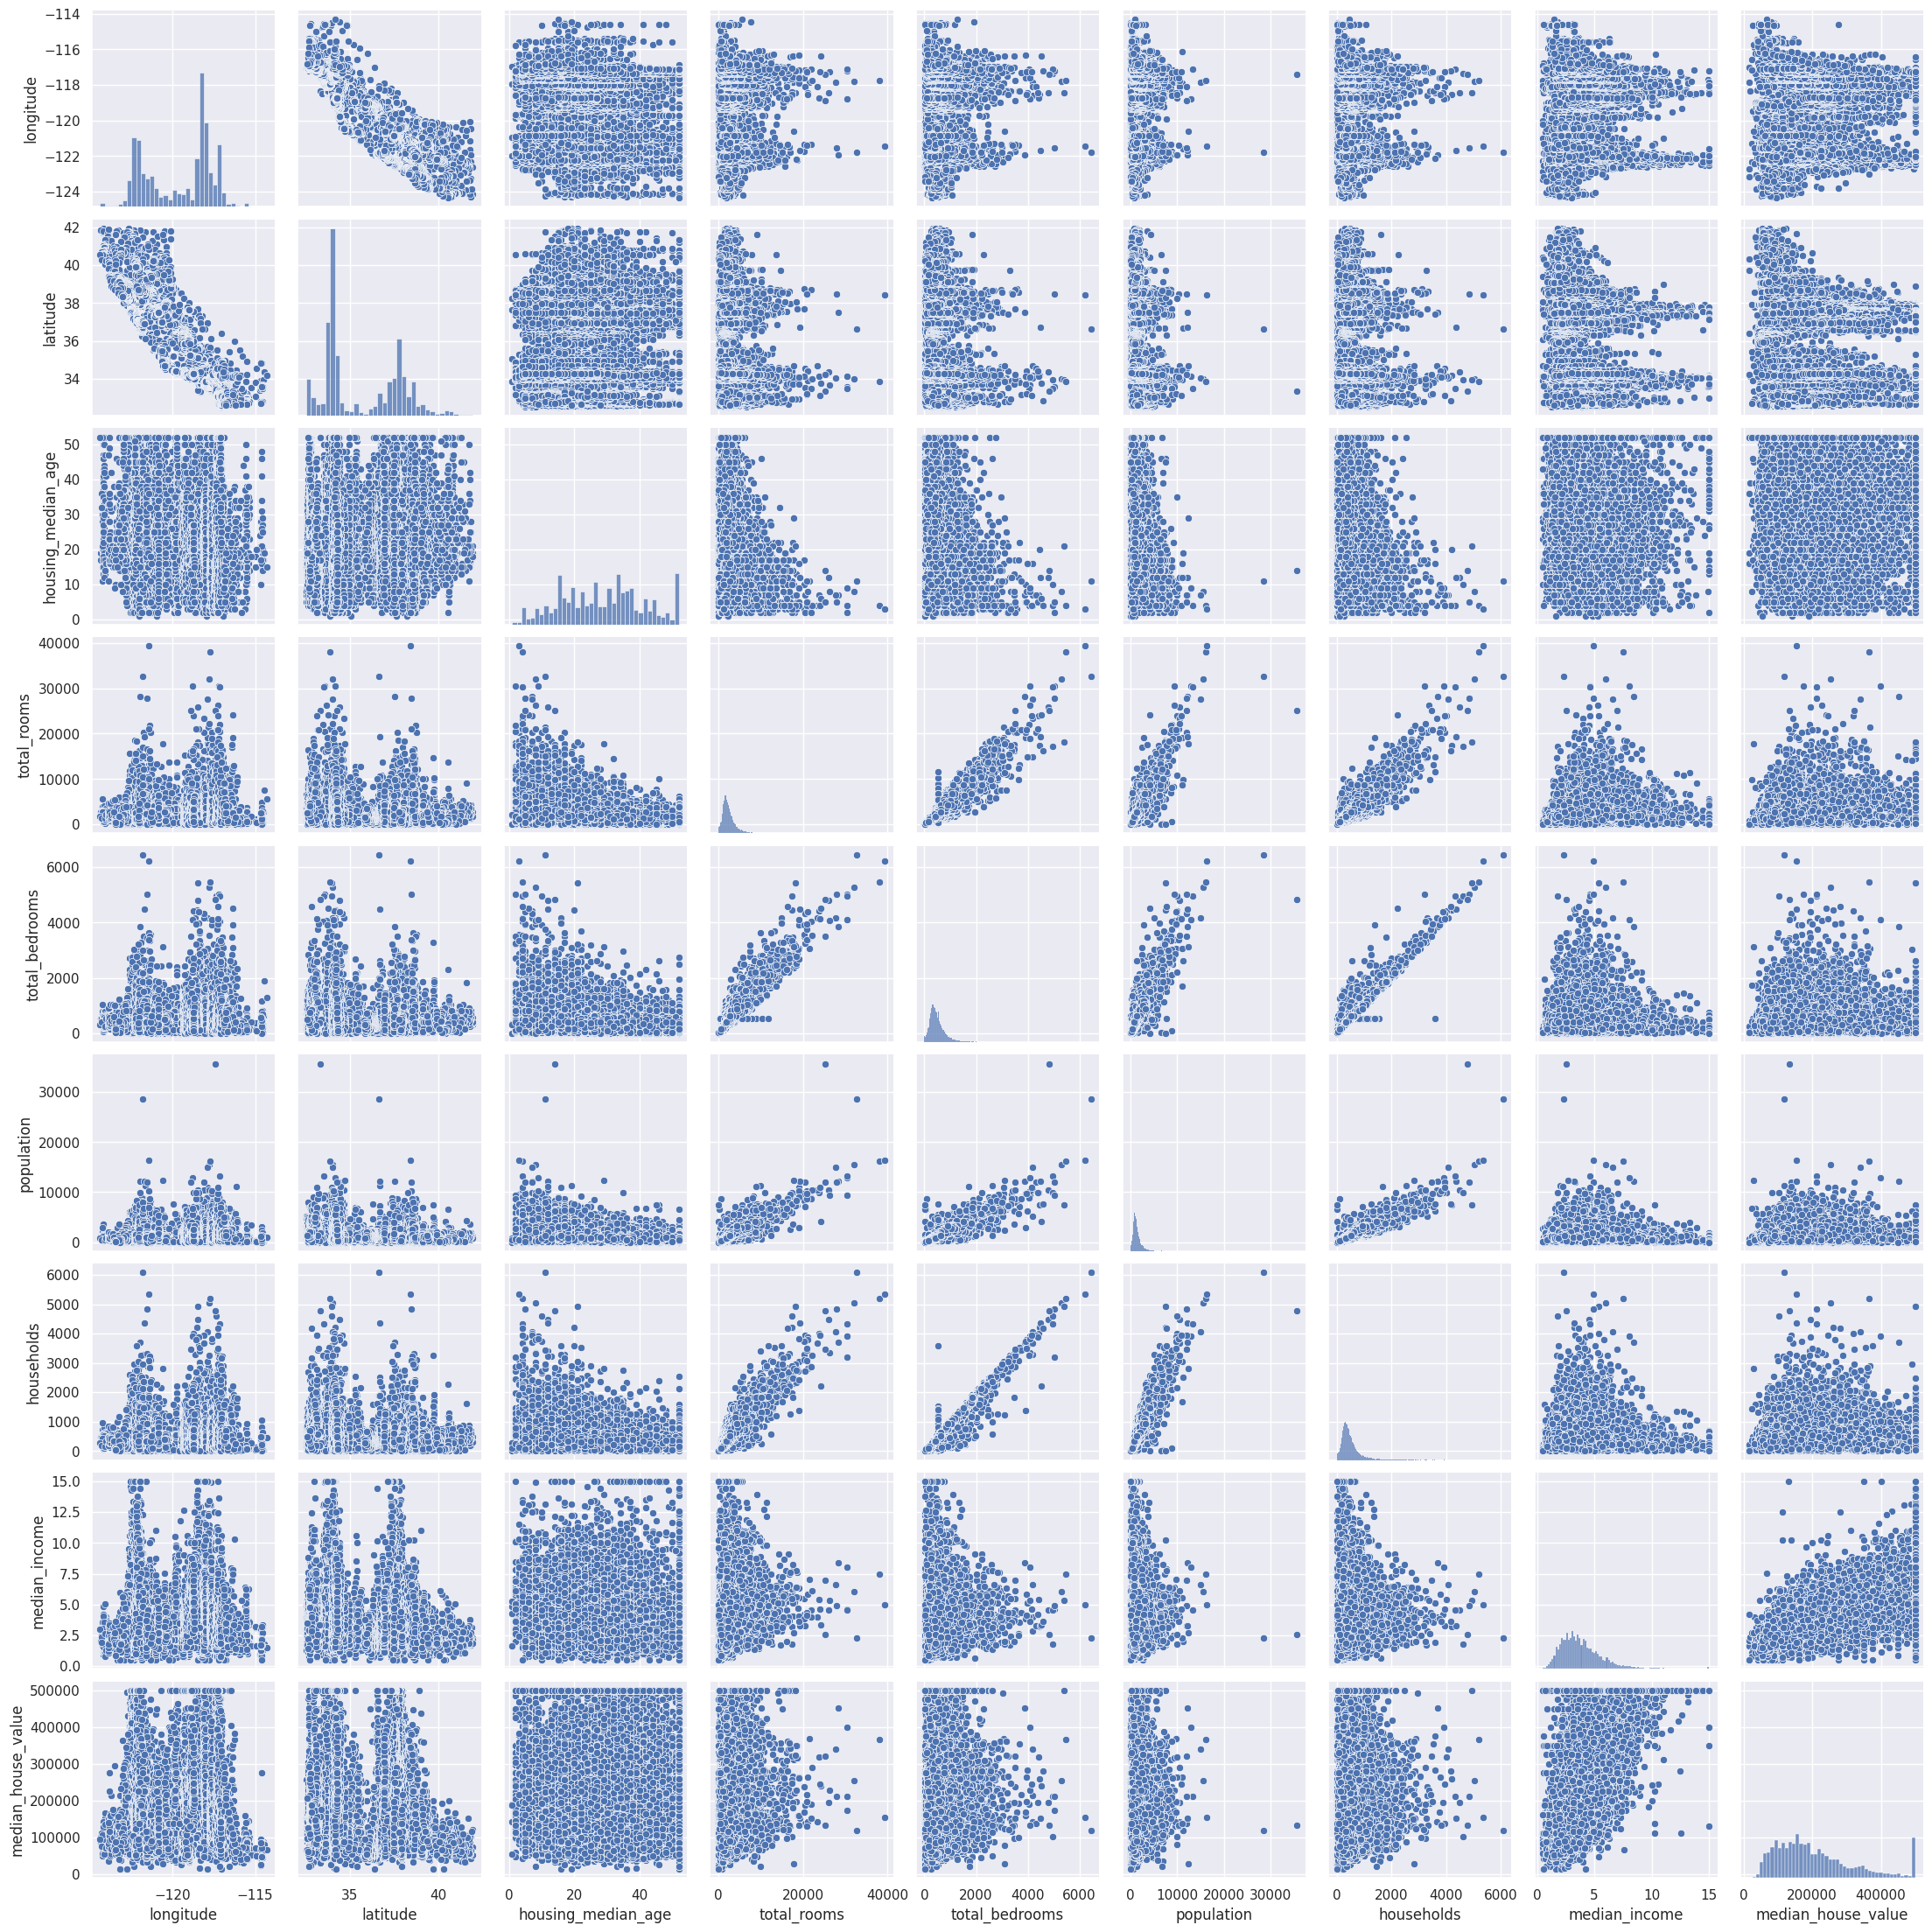

In [93]:
sns.pairplot(data)

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

In [95]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [96]:
data.shape

(20640, 10)

In [97]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [98]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


<Axes: >

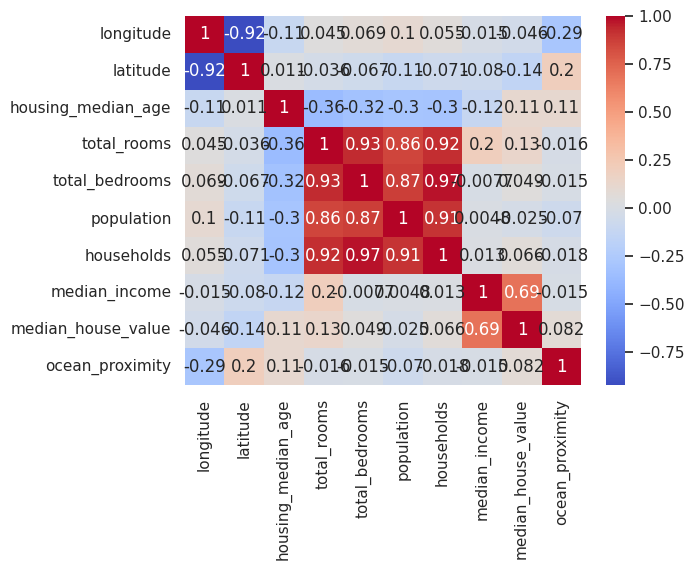

In [99]:
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm')

This is a correlation matrix, which shows the correlation coefficients between each pair of features. The values range from -1 (perfect negative correlation) to 1 (perfect positive correlation).
Here are some observations from the correlation matrix:
Longitude and latitude are highly negatively correlated (-0.924664), which makes sense since they are spatial coordinates.
Total rooms and total bedrooms are highly positively correlated (0.927253), which makes sense since they are related to housing characteristics.
Median income and median house value are highly positively correlated (0.688075), which makes sense since they are related to economic factors.
Ocean proximity has a moderate negative correlation with longitude (-0.289779) and a moderate positive correlation with latitude (0.200974), which makes sense since ocean proximity is related to spatial location.
Housing median age has a moderate negative correlation with total rooms (-0.361262) and total bedrooms (-0.318998), which could indicate that older homes tend to have fewer rooms and bedrooms.
These correlations can help inform feature engineering and selection decisions. For example, you might consider combining longitude and latitude into a single feature, or using dimensionality reduction techniques to reduce the impact of highly correlated features.

# PCA -DIMENSIONALITY REDUCTION

---



In [100]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the longitude and latitude features
pca_features = pca.fit_transform(data[['longitude', 'latitude']])

# Add the PCA features to the data
data['pca1'] = pca_features[:, 0]
data['pca2'] = pca_features[:, 1]

This code is adding two new columns to the data DataFrame, pca1 and pca2, which represent the first two principal components of the data.
Here's a breakdown of the code:
pca_features[:, 0]: This is selecting the first column of the pca_features array, which represents the first principal component.
data['pca1'] = ...: This is adding a new column to the data DataFrame called pca1 and assigning it the values from the first principal component.
pca_features[:, 1]: This is selecting the second column of the pca_features array, which represents the second principal component.
data['pca2'] = ...: This is adding a new column to the data DataFrame called pca2 and assigning it the values from the second principal component.
By doing this, we're effectively reducing the dimensionality of the data from the original number of features to just two features, pca1 and pca2, which capture the most variance in the data.
These new columns can then be used as input features for machine learning models, visualized to understand the relationships between the data points, or used for other analysis purposes.

# **FEATURE SELECTION**

---



In [101]:
from sklearn.feature_selection import SelectKBest

# Select the top 5 features
selector = SelectKBest(k=5)

# Fit and transform the data
selected_features = selector.fit_transform(data.drop('median_house_value', axis=1), data['median_house_value'])

# Get the names of the selected features
selected_feature_names = data.drop('median_house_value', axis=1).columns[selector.get_support()]

# Add the selected features to the data with their original names
data[selected_feature_names] = selected_features

# SCALING

---



In [102]:
from sklearn.preprocessing import StandardScaler

# Scale the selected features
scaler = StandardScaler()
data[selected_feature_names] = scaler.fit_transform(data[selected_feature_names])

In [103]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
X = data[selected_feature_names]
y = data['median_house_value']
ridge_model = Ridge(alpha=10)  #IF FEATURE SELECTIONN USED
ridge_model.fit(X, y)

Ridge(alpha=10)

In [104]:
"""
from sklearn.feature_selection import SelectKBest

# Select the top 5 features
selector = SelectKBest(k=5)

# Fit and transform the data
selected_features = selector.fit_transform(data.drop('median_house_value', axis=1), data['median_house_value'])

# Add the selected features to the data
data['feature1'] = selected_features[:, 0]
data['feature2'] = selected_features[:, 1]
data['feature3'] = selected_features[:, 2]
data['feature4'] = selected_features[:, 3]
data['feature5'] = selected_features[:, 4]
"""

"\nfrom sklearn.feature_selection import SelectKBest\n\n# Select the top 5 features\nselector = SelectKBest(k=5)\n\n# Fit and transform the data\nselected_features = selector.fit_transform(data.drop('median_house_value', axis=1), data['median_house_value'])\n\n# Add the selected features to the data\ndata['feature1'] = selected_features[:, 0]\ndata['feature2'] = selected_features[:, 1]\ndata['feature3'] = selected_features[:, 2]\ndata['feature4'] = selected_features[:, 3]\ndata['feature5'] = selected_features[:, 4]\n"

In [105]:
"""

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(data.drop('median_house_value', axis=1), data['median_house_value'], test_size=0.2, random_state=42)
"""

"\n\n# Split the data into training and testing sets\n#X_train, X_test, y_train, y_test = train_test_split(data.drop('median_house_value', axis=1), data['median_house_value'], test_size=0.2, random_state=42)\n"

In [106]:
"""
# Define the features (X) and target variable (y)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]
"""

'\n# Define the features (X) and target variable (y)\nX = data.drop("median_house_value", axis=1)\ny = data["median_house_value"]\n'

In [107]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:

# Create a Ridge Regression model
#ridge_model = Ridge(alpha=0.1)  #IF FEATURE SELECTION NOT USED

In [109]:
# Train the model
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [110]:
# Make predictions
y_pred = ridge_model.predict(X_test)

In [111]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse)

Ridge Regression MSE: 5590579974.250708


The Mean Squared Error (MSE) of 5055021605.1929655 indicates that the Ridge Regression model is not performing well. A high MSE value means that the model's predictions are far away from the actual values.
Here are a few things you can try to improve the model's performance:
Feature scaling: Try scaling the features using StandardScaler or MinMaxScaler to ensure they're on the same scale.
Hyperparameter tuning: Adjust the alpha parameter in the Ridge Regression model to find the optimal value.
Model selection: Try using a different model, such as Lasso Regression or Elastic Net Regression, to see if they perform better.
Data preprocessing: Check for any missing values, outliers, or correlations in the data that could be affecting the model's performance.
Feature engineering: Try creating new features or transforming existing ones to improve the model's performance.

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [113]:
#print the best parameteers through hyperparameter tuning
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'alpha': 10}
Best score: 0.5876508932276281


The hyperparameter tuning using GridSearchCV has found the optimal alpha value to be 10, and the best score (R-squared value) is approximately 0.638.
This means that the Ridge Regression model with alpha=10 explains about 63.8% of the variance in the target variable (median_house_value).
Now we can train a new Ridge Regression model using the optimal alpha value and evaluate its performance on the test set:

In [114]:
# Get the best parameters
best_params = grid_search.best_params_

In [115]:
# Train a new Ridge Regression model using the best parameters
best_model = Ridge(**best_params)
best_model.fit(X_train, y_train)

Ridge(alpha=10)

In [116]:

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [117]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse)

Ridge Regression MSE: 5590579974.250708


In this code, we first perform hyperparameter tuning using GridSearchCV. Then, we get the best parameters using grid_search.best_params_. We train a new Ridge Regression model using these best parameters and evaluate its performance on the test set.
By using the best parameters, we should get a better performance than the initial model.

# **LASSO REGRESSION**

---



In [118]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Lasso Regression MSE:", mse)

Lasso Regression MSE: 5590744764.14424


Lasso and Ridge Regression are both regularization techniques used in linear regression to prevent overfitting.

Lasso Regression:
****************************
Lasso stands for Least Absolute Shrinkage and Selection Operator.
It adds a penalty term to the loss function that is proportional to the absolute value of the model's coefficients.

This penalty term forces some coefficients to be exactly zero, effectively selecting the most important features.

Lasso is useful for feature selection and can handle high-dimensional data.

Ridge Regression:
***************************************************
Ridge Regression adds a penalty term to the loss function that is proportional to the square of the model's coefficients.

This penalty term shrinks the coefficients towards zero, but does not set them exactly to zero.
Ridge Regression is useful for reducing the magnitude of the coefficients and preventing overfitting.

Advantages:
***********************
Prevents Overfitting: Both Lasso and Ridge Regression prevent overfitting by adding a penalty term to the loss function.

Improves Interpretability: Lasso Regression can help identify the most important features by setting some coefficients to zero.

Reduces Model Complexity: Both methods can reduce the complexity of the model by shrinking or setting coefficients to zero.

When to use:
************************
Lasso: Use when you want to select the most important features and have a sparse model.

Ridge: Use when you want to reduce the magnitude of the coefficients and prevent overfitting, but don't want to set coefficients exactly to zero.
